**Bankruptcy Prediction Model with Machine Learning**

Bankruptcy refers to a financial situation where an individual or business is unable to repay debts owed to creditors, resulting in insolvency. If you come from a commerce background and are exploring data science, this concept will likely be familiar to you.

Using **machine learning**, we can develop a model that predicts whether a company or an individual is likely to face bankruptcy in the future. In this tutorial, we’ll build such a model using **Python**.

### Building a Bankruptcy Prediction Model in Python

The dataset used for this project comes from **Kaggle**, originally provided by the **Taiwan Economic Journal**. Let’s begin by importing the dataset along with the necessary Python libraries to start building our bankruptcy prediction model.


In [28]:
### Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
## Load the data

df = pd.read_csv(r"D:\Bankruptcy dataset\Company financials.csv")

In [30]:
## Preview the data

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [31]:
df.shape

(6819, 96)

The dataset has 6819 rows and 96 columns

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [33]:
# Check if any column contains missing values
if df.isnull().values.any():
    print("There are missing values in the dataset:")
    print(df.isnull().sum())
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


No EDA can be done because the data has already been encoded and scaled. We will proceed to checking correlation and model training.

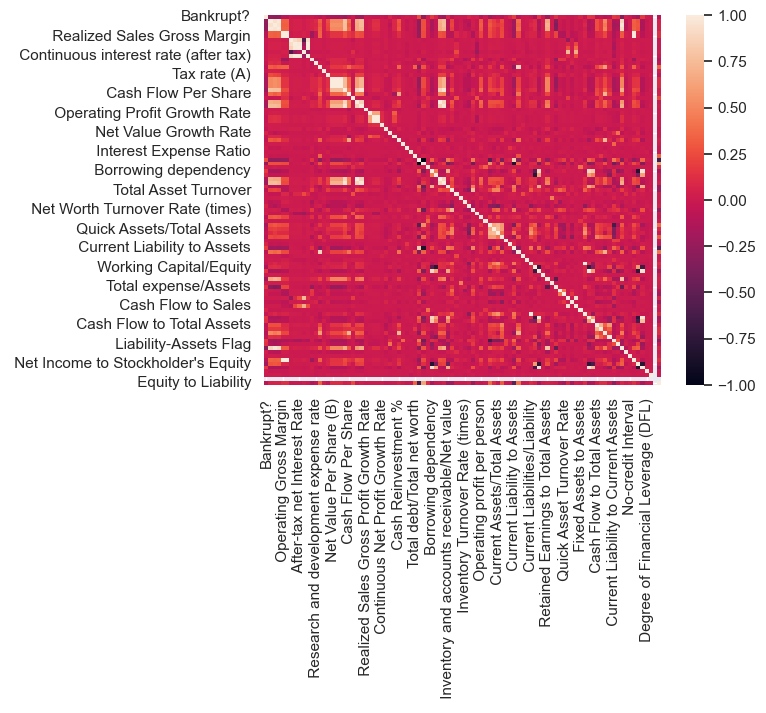

In [34]:
###
sns.set()
sns.heatmap(df.corr())
plt.show()

In [35]:
## Assigning target variable to y

X = df.drop('Bankrupt?', axis=1)  # features
y = df['Bankrupt?']               # target column


In [36]:
## Feature selection

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=30)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print(selected_features)


Index([' ROA(B) before interest and depreciation after tax',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Revenue per person',
       ' Allocation rate per person', ' Cash/Total Assets',
       ' Cash/Current Liability', ' Inventory/Working Capital',
       ' Working Capital/Equity', ' Total income/Total expense',
       ' Net Income to Total Assets', ' No-credit Interval',
       ' Net Income to Stockholder's Equity',
       ' Degree of Financial Leverage (DFL)',

In [37]:
## Assign selected features to X
X_selected = X[selected_features]


In [38]:
## Checking the distribution of the classes
y.value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

The target is imbalanced. we will use smote technique to balance the minority class

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Bankrupt?
0    5279
1     176
Name: count, dtype: int64
After SMOTE: Bankrupt?
0    5279
1    5279
Name: count, dtype: int64


In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)



In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC score
y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.9552785923753666

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.38      0.61      0.47        44

    accuracy                           0.96      1364
   macro avg       0.68      0.79      0.72      1364
weighted avg       0.97      0.96      0.96      1364


Confusion Matrix:
 [[1276   44]
 [  17   27]]

ROC-AUC Score: 0.9508006198347108


In [42]:
### Trying Logistic Regression Model


log_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear', 
    random_state=42
)

log_model.fit(X_train_res, y_train_res)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
## Make predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]


In [44]:

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob_log))


Accuracy: 0.9178885630498533

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1320
           1       0.09      0.16      0.11        44

    accuracy                           0.92      1364
   macro avg       0.53      0.55      0.53      1364
weighted avg       0.94      0.92      0.93      1364


Confusion Matrix:
 [[1245   75]
 [  37    7]]

ROC-AUC Score: 0.5573347107438016


Random forest outperformed the Logistic Regression model. Ensemble methods can be used for further training to improve accuracy.